## Creating and running the CNN or HQNN models on the plant leaves dataset

CNN/HQNN setup: Code in hybrid_nn.py. Core features are:
- 2 CNN layers with batch normalization followed by pooling 
- 2 fully connected linear layers for the classical route
- Linear layer -> quantum layer -> linear layer for the hybrid-quantum route
- Base parameters like learning rate, batch size, etc. are pre-defined in config.yml
- The network was set up to be simple enough to allow the incorporation of a quantum layer to significantly impact the model's capability to learn patterns in the dataset. 

<br>

Training algorithm: See model_setup.py for the code. Core features are:
- CrossEntropyLoss for classifying multiple leaf categories
- Batch processing followed by accuracy metrics per epoch on the entire train and test data
- Learning rate scheduling (starts high and reduces by half every step_size=10 epochs)
- Gradient clipping to prevent exploding gradients common in hybrid-quantum setups
- Early stopping from trainig plateaus or nearing overfitting when training accuracy reaches above 99.5%

<br>

Wrapper function build_and_run_nn()
- Classical CNN - pass None for qubit_count and quantum_layer_args
- HQNN with a quantum layer - include the above arguments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cudaq
from cudaq import spin
from src.model_builder import build_and_run_nn
from src.utils.model_utils.quantum_layer import QuantumFunction

# Section 1. 
## Classical CNN:

Datset size: The dataset is not large (~1500 samples for the 5 leaf labels chosen in config.yml). 
- These 5 leaves were chosen as they were the most visually distinct and differences between them could be captured by this relatively simple CNN setup. 
- However, with this few of samples, the CNN tends to memorize the dataset. Dropout, batch normalization, & limiting the number of linear neurons help significantly to reduce overfitting.
- A larger data set would be better, but the purpose of this is to test if a HQNN reaches similar results to the CNN
    - And if so, how complex does the quantum layer's kernel & hamiltonians need to be?

In [ ]:
# Run the wrapper function to load augmented dataset & run CNN/HQNN

# Classical ex.
training_params = {
    'learning_rate_init': 0.0001,
    'l2_regularization': 0.001,
    'epochs': 1000,
    'early_stopping': 25,
    'batch_size': 50,
    'dropout': 0.5
}

cnn_fc_layers = {
    'conv_channels_1':32, 
    'conv_channels_2':64,
    'fc_neurons_1':128, 
    'fc_neurons_2':64, 
}

result = build_and_run_nn('categories', 
                          cnn_fc_layer_args=cnn_fc_layers,
                          quantum_layer_args=None,
                          training_params=training_params)

Number of classes 5
Y values (tensor(0), tensor(4))

Epoch 0, Learning Rate: 0.0001


epoch 0: 100%|██████████| 30/30 [00:06<00:00,  4.31batch/s, acc=0.471, loss=1.32]


Training accuracy (all samples) = 0.434
Test accuracy = 0.453

Epoch 1, Learning Rate: 0.0001


epoch 1: 100%|██████████| 30/30 [00:07<00:00,  4.15batch/s, acc=0.706, loss=0.631]


Training accuracy (all samples) = 0.724
Test accuracy = 0.688

Epoch 2, Learning Rate: 0.0001


epoch 2: 100%|██████████| 30/30 [00:07<00:00,  4.12batch/s, acc=0.882, loss=0.192]


Training accuracy (all samples) = 0.923
Test accuracy = 0.835

Epoch 3, Learning Rate: 0.0001


epoch 3: 100%|██████████| 30/30 [00:07<00:00,  3.94batch/s, acc=0.882, loss=0.23]


Training accuracy (all samples) = 0.956
Test accuracy = 0.857

Epoch 4, Learning Rate: 0.0001


epoch 4: 100%|██████████| 30/30 [00:07<00:00,  4.11batch/s, acc=0.765, loss=0.334]


Training accuracy (all samples) = 0.970
Test accuracy = 0.870

Epoch 5, Learning Rate: 0.0001


epoch 5: 100%|██████████| 30/30 [00:07<00:00,  3.95batch/s, acc=0.882, loss=0.287]


Training accuracy (all samples) = 0.980
Test accuracy = 0.868

Epoch 6, Learning Rate: 0.0001


epoch 6: 100%|██████████| 30/30 [00:07<00:00,  4.17batch/s, acc=0.941, loss=0.224]


Training accuracy (all samples) = 0.980
Test accuracy = 0.876

Epoch 7, Learning Rate: 0.0001


epoch 7: 100%|██████████| 30/30 [00:07<00:00,  4.03batch/s, acc=0.882, loss=0.287]


Training accuracy (all samples) = 0.983
Test accuracy = 0.884

Epoch 8, Learning Rate: 0.0001


epoch 8: 100%|██████████| 30/30 [00:07<00:00,  4.07batch/s, acc=1, loss=0.0544]  


Training accuracy (all samples) = 0.983
Test accuracy = 0.878

Epoch 9, Learning Rate: 0.0001


epoch 9: 100%|██████████| 30/30 [00:07<00:00,  4.09batch/s, acc=0.882, loss=0.404]


Training accuracy (all samples) = 0.984
Test accuracy = 0.871

Epoch 10, Learning Rate: 5e-05


epoch 10: 100%|██████████| 30/30 [00:07<00:00,  4.08batch/s, acc=0.882, loss=0.605]


Training accuracy (all samples) = 0.988
Test accuracy = 0.870

Epoch 11, Learning Rate: 5e-05


epoch 11: 100%|██████████| 30/30 [00:07<00:00,  4.07batch/s, acc=0.765, loss=0.515]


Training accuracy (all samples) = 0.990
Test accuracy = 0.876

Epoch 12, Learning Rate: 5e-05


epoch 12: 100%|██████████| 30/30 [00:07<00:00,  4.06batch/s, acc=1, loss=0.0123]   


Training accuracy (all samples) = 0.991
Test accuracy = 0.881

Epoch 13, Learning Rate: 5e-05


epoch 13: 100%|██████████| 30/30 [00:07<00:00,  3.92batch/s, acc=0.941, loss=0.124]


Training accuracy (all samples) = 0.993
Test accuracy = 0.886

Epoch 14, Learning Rate: 5e-05


epoch 14: 100%|██████████| 30/30 [00:07<00:00,  3.99batch/s, acc=0.824, loss=0.205]


Training accuracy (all samples) = 0.995
Test accuracy = 0.878

Epoch 15, Learning Rate: 5e-05


epoch 15: 100%|██████████| 30/30 [00:07<00:00,  4.09batch/s, acc=0.824, loss=0.627]


Training accuracy (all samples) = 0.995
Test accuracy = 0.887

Epoch 16, Learning Rate: 5e-05


epoch 16: 100%|██████████| 30/30 [00:07<00:00,  4.01batch/s, acc=0.941, loss=0.12] 


Training accuracy (all samples) = 0.995
Test accuracy = 0.887

Epoch 17, Learning Rate: 5e-05


epoch 17: 100%|██████████| 30/30 [00:07<00:00,  3.98batch/s, acc=1, loss=0.0383]   


Training accuracy (all samples) = 0.993
Test accuracy = 0.881

Epoch 18, Learning Rate: 5e-05


epoch 18: 100%|██████████| 30/30 [00:07<00:00,  4.16batch/s, acc=0.941, loss=0.0832]


Training accuracy (all samples) = 0.993
Test accuracy = 0.882

Epoch 19, Learning Rate: 5e-05


epoch 19: 100%|██████████| 30/30 [00:07<00:00,  4.08batch/s, acc=0.824, loss=0.619]


Training accuracy (all samples) = 0.995
Test accuracy = 0.874

Early stopping at epoch 19, training accuracy > 99.5%.
Saved neural network fitting results and model to ./data/traditional_nn_1744913895


HybridNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=161280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc_out): Linear(in_features=64, out_features=5, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


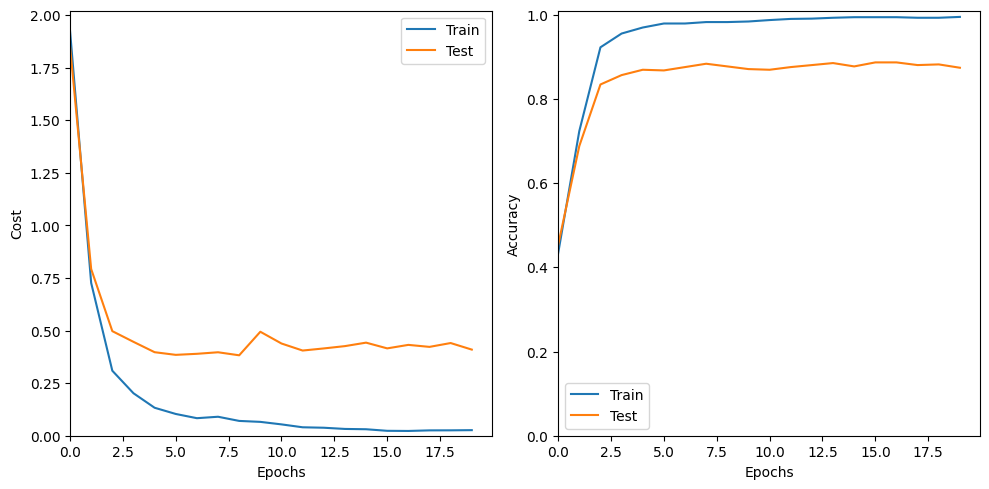

In [ ]:
file_name = result[-1]
print(result[-2])

df = pd.read_csv(file_name + '.csv')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['training_cost'], label='Train')
plt.plot(df['testing_cost'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(1, 2, 2)
plt.plot(df['training_accuracy'], label='Train')
plt.plot(df['testing_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,)
plt.ylim(0,1.01)

plt.tight_layout()
plt.show()

# Section 2.
## HQNN - initial testing

Overall:
The first HQNN setup is working and training, albeit at a slower pace than the classical CNN above and with poorer accuracy (capping out near 0.5). Fine tuning the quantum layer's kernel and measurement hamiltonians are the prime parameters that need to be altered. Some key points about this HQNN setup:

- Qubits are initialized, angle encoded, and then entangled
    - n_qubits = 5, mimics the 5 leaf classes being categorized in this example.
    - 2 angles (rx and ry) are encoded from 2 inputs per qubit from the preceeding NN linear layer.
    - Entangling after encoding allows for feature mixing.
- Training in early epochs is quite noisy until it plateaus
    - Expcted as small shifts in input parameters into the quantum layer can drastically impact expectation value outputs even with simple Pauli-Z hamiltonians.
    - The losses do trend downward with each epoch.
    - Learning rate (LR) scheduling helps to find a good LR region in which the quantum parameters can learn. Usually this is with smaller LR's than in conventional neural networks.
- Gradients are non-zero and flowing through the quantum circuit, however:
    - The current combination of hamiltonians & quantum kernel is not expressive enough to adapt to 5 classes, resulting in a training plateau around 0.5 accuracy. This is still better than randomly selecting 1 out of the 5 classes, where the plateau would be around 0.2.
- Minor changes in the hamiltonians and/or cudaq kernel can have drastic impacts on the model.
    - e.g., changing hamiltonians from Pauli-Z=spin.z(x) to Pauli-Z * Pauli-X=spin.z(0)*spin.x(0) makes the outputs of the quantum layer almost always 0. This completely inhibits training.
    - Adding/removing entanglement (current iteration - entangles via first qubit as shown below) does not seem to have a significant impact on training capacity. 
- The $2^n$ basis states where n=5 qubits is larger than needed for classifying 5 plant leaves.
    - See the section after this one on potential improvements to reduce unneeded basis state amplitudes

<br> 
<br>

(Note: CUDA-Q can connect to real quantum computer API's if simulating on a local cpu/gpu is insufficient.)

#### HQNN example 1 - expressive enough to train
- Combination of Hamiltonian & Quantum Kernel in the quantum layer allows this setup to train to an accuracy ~0.5
- Still unable to fully capture & predict the 5 classes properly. Ideas why & improvement paths in the following section.

In [ ]:
# Moderately expressive Hamiltonian + Kernel

training_params = {
    'learning_rate_init': 0.01,
    'l2_regularization': 0.001,
    'epochs': 1000,
    'early_stopping': 25,
    'batch_size': 100,
    'dropout': 0.1
}

cnn_fc_layers = {
    'conv_channels_1':32, 
    'conv_channels_2':64,
    'fc_neurons_1':256, 
    'fc_neurons_2':0, 
}

quantum_layer = {
    'qubit_count': 5,
    'hamiltonians': [spin.z(0), 
                     spin.z(1), 
                     spin.z(2), 
                     spin.z(3), 
                     spin.z(4)],
    'shift': torch.tensor(torch.pi / 4),
    'quantum_param_init_scale': 100.0,
    'features_per_qubit': 2,
    'n_classes': 5}


print('''Example drawing of the quantum kernel at the heart of the quantum layer. 
Inputs from the previous linear layer get encoded as rotations about y and rotations about x (ry & rx, respectively) for the 5 qubits. 
The qubits are then entangled, and measurements of the state of each qubit is evaluated with the above hamiltonians.''')

qf = QuantumFunction(5, quantum_layer.get('hamiltonians'), quantum_layer.get('features_per_qubit'))
ry_ex = np.array([0.1,0.2,0.3,0.4,0.5])
rx_ex = np.array([6,7,8,9,10])

print(cudaq.draw(qf.kernel, ry_ex, rx_ex))



Example drawing of the quantum kernel at the heart of the quantum layer. 
Inputs from the previous linear layer get encoded as rotations about y and rotations about x (ry & rx, respectively) for the 5 qubits. 
The qubits are then entangled, and measurements of the state of each qubit is evaluated with the above hamiltonians.
     ╭─────────╮╭───────╮                     
q0 : ┤ ry(0.1) ├┤ rx(6) ├───●────●────●────●──
     ├─────────┤├───────┤ ╭─┴─╮  │    │    │  
q1 : ┤ ry(0.2) ├┤ rx(7) ├─┤ x ├──┼────┼────┼──
     ├─────────┤├───────┤ ╰───╯╭─┴─╮  │    │  
q2 : ┤ ry(0.3) ├┤ rx(8) ├──────┤ x ├──┼────┼──
     ├─────────┤├───────┤      ╰───╯╭─┴─╮  │  
q3 : ┤ ry(0.4) ├┤ rx(9) ├───────────┤ x ├──┼──
     ├─────────┤├───────┴╮          ╰───╯╭─┴─╮
q4 : ┤ ry(0.5) ├┤ rx(10) ├───────────────┤ x ├
     ╰─────────╯╰────────╯               ╰───╯



In [ ]:
result = build_and_run_nn('categories', 
                          cnn_fc_layer_args=cnn_fc_layers,
                          quantum_layer_args=quantum_layer,
                          training_params=training_params)

Number of classes 5
Y values (tensor(0), tensor(4))

Epoch 0, Learning Rate: 0.01


epoch 0: 100%|██████████| 15/15 [00:28<00:00,  1.91s/batch, acc=0.179, loss=29.8]


Training accuracy (all samples) = 0.196
Test accuracy = 0.210

Epoch 1, Learning Rate: 0.01


epoch 1: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.239, loss=18.8]


Training accuracy (all samples) = 0.210
Test accuracy = 0.216

Epoch 2, Learning Rate: 0.01


epoch 2: 100%|██████████| 15/15 [00:28<00:00,  1.92s/batch, acc=0.239, loss=7.56]


Training accuracy (all samples) = 0.273
Test accuracy = 0.275

Epoch 3, Learning Rate: 0.01


epoch 3: 100%|██████████| 15/15 [00:28<00:00,  1.93s/batch, acc=0.269, loss=7.95]


Training accuracy (all samples) = 0.297
Test accuracy = 0.266

Epoch 4, Learning Rate: 0.01


epoch 4: 100%|██████████| 15/15 [00:29<00:00,  1.98s/batch, acc=0.239, loss=3.68]


Training accuracy (all samples) = 0.298
Test accuracy = 0.318

Epoch 5, Learning Rate: 0.01


epoch 5: 100%|██████████| 15/15 [00:29<00:00,  1.96s/batch, acc=0.254, loss=3.05]


Training accuracy (all samples) = 0.258
Test accuracy = 0.246

Epoch 6, Learning Rate: 0.01


epoch 6: 100%|██████████| 15/15 [00:29<00:00,  2.00s/batch, acc=0.164, loss=4.37]


Training accuracy (all samples) = 0.161
Test accuracy = 0.172

Epoch 7, Learning Rate: 0.01


epoch 7: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.388, loss=2.04]


Training accuracy (all samples) = 0.134
Test accuracy = 0.130

Epoch 8, Learning Rate: 0.01


epoch 8: 100%|██████████| 15/15 [00:29<00:00,  1.95s/batch, acc=0.269, loss=2.61]


Training accuracy (all samples) = 0.223
Test accuracy = 0.199

Epoch 9, Learning Rate: 0.01


epoch 9: 100%|██████████| 15/15 [00:28<00:00,  1.92s/batch, acc=0.224, loss=2.79]


Training accuracy (all samples) = 0.302
Test accuracy = 0.291

Epoch 10, Learning Rate: 0.005


epoch 10: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.239, loss=11.6]


Training accuracy (all samples) = 0.178
Test accuracy = 0.194

Epoch 11, Learning Rate: 0.005


epoch 11: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.254, loss=12.4]


Training accuracy (all samples) = 0.252
Test accuracy = 0.246

Epoch 12, Learning Rate: 0.005


epoch 12: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.269, loss=1.64]


Training accuracy (all samples) = 0.218
Test accuracy = 0.189

Epoch 13, Learning Rate: 0.005


epoch 13: 100%|██████████| 15/15 [00:28<00:00,  1.92s/batch, acc=0.284, loss=1.91]


Training accuracy (all samples) = 0.275
Test accuracy = 0.280

Epoch 14, Learning Rate: 0.005


epoch 14: 100%|██████████| 15/15 [00:28<00:00,  1.92s/batch, acc=0.269, loss=1.96]


Training accuracy (all samples) = 0.233
Test accuracy = 0.229

Epoch 15, Learning Rate: 0.005


epoch 15: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.209, loss=2.54]


Training accuracy (all samples) = 0.282
Test accuracy = 0.291

Epoch 16, Learning Rate: 0.005


epoch 16: 100%|██████████| 15/15 [00:28<00:00,  1.92s/batch, acc=0.179, loss=2.09]


Training accuracy (all samples) = 0.258
Test accuracy = 0.275

Epoch 17, Learning Rate: 0.005


epoch 17: 100%|██████████| 15/15 [00:29<00:00,  1.98s/batch, acc=0.284, loss=2.2]


Training accuracy (all samples) = 0.249
Test accuracy = 0.223

Epoch 18, Learning Rate: 0.005


epoch 18: 100%|██████████| 15/15 [00:29<00:00,  1.96s/batch, acc=0.358, loss=5.89]


Training accuracy (all samples) = 0.354
Test accuracy = 0.328

Epoch 19, Learning Rate: 0.005


epoch 19: 100%|██████████| 15/15 [00:31<00:00,  2.07s/batch, acc=0.373, loss=7.88]


Training accuracy (all samples) = 0.372
Test accuracy = 0.378

Epoch 20, Learning Rate: 0.0025


epoch 20: 100%|██████████| 15/15 [00:30<00:00,  2.00s/batch, acc=0.194, loss=1.85]


Training accuracy (all samples) = 0.254
Test accuracy = 0.231

Epoch 21, Learning Rate: 0.0025


epoch 21: 100%|██████████| 15/15 [00:31<00:00,  2.09s/batch, acc=0.313, loss=19.7]


Training accuracy (all samples) = 0.414
Test accuracy = 0.424

Epoch 22, Learning Rate: 0.0025


epoch 22: 100%|██████████| 15/15 [00:31<00:00,  2.08s/batch, acc=0.269, loss=9.83]


Training accuracy (all samples) = 0.204
Test accuracy = 0.202

Epoch 23, Learning Rate: 0.0025


epoch 23: 100%|██████████| 15/15 [00:30<00:00,  2.02s/batch, acc=0.179, loss=2.61]


Training accuracy (all samples) = 0.256
Test accuracy = 0.275

Epoch 24, Learning Rate: 0.0025


epoch 24: 100%|██████████| 15/15 [00:29<00:00,  1.98s/batch, acc=0.358, loss=2.75]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 25, Learning Rate: 0.0025


epoch 25: 100%|██████████| 15/15 [00:30<00:00,  2.01s/batch, acc=0.239, loss=1.69]


Training accuracy (all samples) = 0.279
Test accuracy = 0.266

Epoch 26, Learning Rate: 0.0025


epoch 26: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.313, loss=11.9]


Training accuracy (all samples) = 0.316
Test accuracy = 0.342

Epoch 27, Learning Rate: 0.0025


epoch 27: 100%|██████████| 15/15 [00:29<00:00,  1.96s/batch, acc=0.448, loss=8.59]


Training accuracy (all samples) = 0.494
Test accuracy = 0.499

Epoch 28, Learning Rate: 0.0025


epoch 28: 100%|██████████| 15/15 [00:30<00:00,  2.06s/batch, acc=0.418, loss=14.8]


Training accuracy (all samples) = 0.374
Test accuracy = 0.378

Epoch 29, Learning Rate: 0.0025


epoch 29: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.448, loss=15.3]


Training accuracy (all samples) = 0.466
Test accuracy = 0.475

Epoch 30, Learning Rate: 0.00125


epoch 30: 100%|██████████| 15/15 [00:29<00:00,  2.00s/batch, acc=0.313, loss=1.71]


Training accuracy (all samples) = 0.301
Test accuracy = 0.283

Epoch 31, Learning Rate: 0.00125


epoch 31: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.194, loss=12.6]


Training accuracy (all samples) = 0.260
Test accuracy = 0.278

Epoch 32, Learning Rate: 0.00125


epoch 32: 100%|██████████| 15/15 [00:29<00:00,  1.98s/batch, acc=0.433, loss=13.5]


Training accuracy (all samples) = 0.468
Test accuracy = 0.466

Epoch 33, Learning Rate: 0.00125


epoch 33: 100%|██████████| 15/15 [00:29<00:00,  1.95s/batch, acc=0.433, loss=10.1]


Training accuracy (all samples) = 0.448
Test accuracy = 0.456

Epoch 34, Learning Rate: 0.00125


epoch 34: 100%|██████████| 15/15 [00:30<00:00,  2.01s/batch, acc=0.463, loss=12.5]


Training accuracy (all samples) = 0.470
Test accuracy = 0.472

Epoch 35, Learning Rate: 0.00125


epoch 35: 100%|██████████| 15/15 [00:30<00:00,  2.03s/batch, acc=0.433, loss=7.92]


Training accuracy (all samples) = 0.470
Test accuracy = 0.471

Epoch 36, Learning Rate: 0.00125


epoch 36: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.373, loss=14.1]


Training accuracy (all samples) = 0.371
Test accuracy = 0.342

Epoch 37, Learning Rate: 0.00125


epoch 37: 100%|██████████| 15/15 [00:30<00:00,  2.02s/batch, acc=0.448, loss=8.91]


Training accuracy (all samples) = 0.477
Test accuracy = 0.479

Epoch 38, Learning Rate: 0.00125


epoch 38: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.463, loss=4.74]


Training accuracy (all samples) = 0.471
Test accuracy = 0.469

Epoch 39, Learning Rate: 0.00125


epoch 39: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.388, loss=7.23]


Training accuracy (all samples) = 0.426
Test accuracy = 0.424

Epoch 40, Learning Rate: 0.000625


epoch 40: 100%|██████████| 15/15 [00:28<00:00,  1.93s/batch, acc=0.478, loss=2.34]


Training accuracy (all samples) = 0.484
Test accuracy = 0.472

Epoch 41, Learning Rate: 0.000625


epoch 41: 100%|██████████| 15/15 [00:28<00:00,  1.93s/batch, acc=0.448, loss=6.37]


Training accuracy (all samples) = 0.485
Test accuracy = 0.485

Epoch 42, Learning Rate: 0.000625


epoch 42: 100%|██████████| 15/15 [00:29<00:00,  1.96s/batch, acc=0.493, loss=2.07]


Training accuracy (all samples) = 0.504
Test accuracy = 0.509

Epoch 43, Learning Rate: 0.000625


epoch 43: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.373, loss=1.5]


Training accuracy (all samples) = 0.342
Test accuracy = 0.339

Epoch 44, Learning Rate: 0.000625


epoch 44: 100%|██████████| 15/15 [00:28<00:00,  1.91s/batch, acc=0.493, loss=3.08]


Training accuracy (all samples) = 0.459
Test accuracy = 0.455

Epoch 45, Learning Rate: 0.000625


epoch 45: 100%|██████████| 15/15 [00:29<00:00,  1.95s/batch, acc=0.403, loss=2.67]


Training accuracy (all samples) = 0.391
Test accuracy = 0.396

Epoch 46, Learning Rate: 0.000625


epoch 46: 100%|██████████| 15/15 [00:28<00:00,  1.90s/batch, acc=0.507, loss=2.82]


Training accuracy (all samples) = 0.493
Test accuracy = 0.474

Epoch 47, Learning Rate: 0.000625


epoch 47: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.478, loss=5.44]


Training accuracy (all samples) = 0.507
Test accuracy = 0.482

Epoch 48, Learning Rate: 0.000625


epoch 48: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.478, loss=6.24]


Training accuracy (all samples) = 0.501
Test accuracy = 0.480

Epoch 49, Learning Rate: 0.000625


epoch 49: 100%|██████████| 15/15 [00:30<00:00,  2.02s/batch, acc=0.403, loss=1.92]


Training accuracy (all samples) = 0.359
Test accuracy = 0.331

Epoch 50, Learning Rate: 0.0003125


epoch 50: 100%|██████████| 15/15 [00:29<00:00,  1.97s/batch, acc=0.433, loss=8.69]


Training accuracy (all samples) = 0.498
Test accuracy = 0.488

Epoch 51, Learning Rate: 0.0003125


epoch 51: 100%|██████████| 15/15 [00:30<00:00,  2.04s/batch, acc=0.493, loss=6.08]


Training accuracy (all samples) = 0.493
Test accuracy = 0.480

Epoch 52, Learning Rate: 0.0003125


epoch 52: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.418, loss=3.42]


Training accuracy (all samples) = 0.458
Test accuracy = 0.442

Epoch 53, Learning Rate: 0.0003125


epoch 53: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.448, loss=7.2]


Training accuracy (all samples) = 0.485
Test accuracy = 0.477

Epoch 54, Learning Rate: 0.0003125


epoch 54: 100%|██████████| 15/15 [00:30<00:00,  2.01s/batch, acc=0.493, loss=7.76]


Training accuracy (all samples) = 0.501
Test accuracy = 0.490

Epoch 55, Learning Rate: 0.0003125


epoch 55: 100%|██████████| 15/15 [00:29<00:00,  1.93s/batch, acc=0.507, loss=2.64]


Training accuracy (all samples) = 0.485
Test accuracy = 0.477

Epoch 56, Learning Rate: 0.0003125


epoch 56: 100%|██████████| 15/15 [00:29<00:00,  1.96s/batch, acc=0.448, loss=6.66]


Training accuracy (all samples) = 0.502
Test accuracy = 0.504

Epoch 57, Learning Rate: 0.0003125


epoch 57: 100%|██████████| 15/15 [00:29<00:00,  1.96s/batch, acc=0.463, loss=7.11]


Training accuracy (all samples) = 0.503
Test accuracy = 0.488

Epoch 58, Learning Rate: 0.0003125


epoch 58: 100%|██████████| 15/15 [00:30<00:00,  2.00s/batch, acc=0.463, loss=7.59]


Training accuracy (all samples) = 0.491
Test accuracy = 0.491

Epoch 59, Learning Rate: 0.0003125


epoch 59: 100%|██████████| 15/15 [00:28<00:00,  1.90s/batch, acc=0.463, loss=8.02]


Training accuracy (all samples) = 0.491
Test accuracy = 0.479

Epoch 60, Learning Rate: 0.00015625


epoch 60: 100%|██████████| 15/15 [00:30<00:00,  2.00s/batch, acc=0.463, loss=3.75]


Training accuracy (all samples) = 0.497
Test accuracy = 0.493

Epoch 61, Learning Rate: 0.00015625


epoch 61: 100%|██████████| 15/15 [00:28<00:00,  1.93s/batch, acc=0.448, loss=4.25]


Training accuracy (all samples) = 0.475
Test accuracy = 0.485

Epoch 62, Learning Rate: 0.00015625


epoch 62: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.478, loss=3.78]


Training accuracy (all samples) = 0.487
Test accuracy = 0.498

Epoch 63, Learning Rate: 0.00015625


epoch 63: 100%|██████████| 15/15 [00:29<00:00,  1.95s/batch, acc=0.478, loss=5.71]


Training accuracy (all samples) = 0.500
Test accuracy = 0.472

Epoch 64, Learning Rate: 0.00015625


epoch 64: 100%|██████████| 15/15 [00:29<00:00,  1.99s/batch, acc=0.433, loss=7.44]


Training accuracy (all samples) = 0.495
Test accuracy = 0.493

Epoch 65, Learning Rate: 0.00015625


epoch 65: 100%|██████████| 15/15 [00:28<00:00,  1.92s/batch, acc=0.522, loss=6.75]


Training accuracy (all samples) = 0.495
Test accuracy = 0.499

Epoch 66, Learning Rate: 0.00015625


epoch 66: 100%|██████████| 15/15 [00:29<00:00,  1.96s/batch, acc=0.463, loss=5.92]


Training accuracy (all samples) = 0.503
Test accuracy = 0.475

Epoch 67, Learning Rate: 0.00015625


epoch 67: 100%|██████████| 15/15 [00:28<00:00,  1.92s/batch, acc=0.433, loss=8.09]


Training accuracy (all samples) = 0.504
Test accuracy = 0.482

Epoch 68, Learning Rate: 0.00015625


epoch 68: 100%|██████████| 15/15 [00:29<00:00,  1.94s/batch, acc=0.493, loss=11.2]


Training accuracy (all samples) = 0.498
Test accuracy = 0.485

Epoch 69, Learning Rate: 0.00015625


epoch 69: 100%|██████████| 15/15 [00:27<00:00,  1.86s/batch, acc=0.463, loss=7.41]


Training accuracy (all samples) = 0.489
Test accuracy = 0.493

Epoch 70, Learning Rate: 7.8125e-05


epoch 70: 100%|██████████| 15/15 [00:29<00:00,  1.95s/batch, acc=0.463, loss=4.68]


Training accuracy (all samples) = 0.498
Test accuracy = 0.493

Epoch 71, Learning Rate: 7.8125e-05


epoch 71: 100%|██████████| 15/15 [00:30<00:00,  2.04s/batch, acc=0.463, loss=6.93]


Training accuracy (all samples) = 0.496
Test accuracy = 0.488

Epoch 72, Learning Rate: 7.8125e-05


epoch 72: 100%|██████████| 15/15 [00:30<00:00,  2.02s/batch, acc=0.448, loss=7.66]


Training accuracy (all samples) = 0.504
Test accuracy = 0.498

Early stopping at epoch 72 due to training accuracy plateau.
Saved neural network fitting results and model to ./data/hybrid_quantum_nn_1744927206


HybridNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=161280, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (quantum): QuantumLayer()
  (fc_out): Linear(in_features=5, out_features=5, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


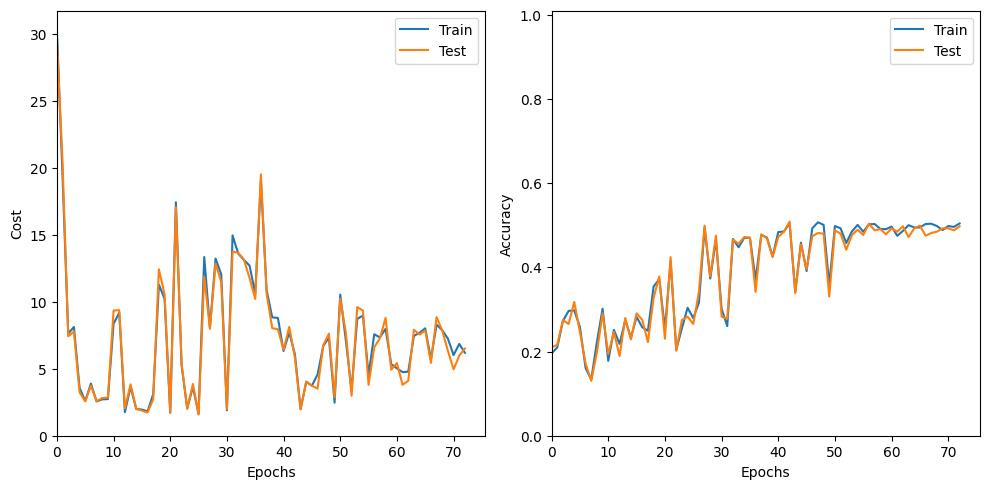

In [4]:
file_name = result[-1]
print(result[-2])

df = pd.read_csv(file_name + '.csv')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['training_cost'], label='Train')
plt.plot(df['testing_cost'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(1, 2, 2)
plt.plot(df['training_accuracy'], label='Train')
plt.plot(df['testing_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,)
plt.ylim(0,1.01)

plt.tight_layout()
plt.show()

#### HQNN example 2 - not expressive enough to train
- Only change from above example - Hamiltonians goes from to Pauli-Z to Pauli-Z * Pauli-X
    - In effect, this cahnge makes the output from quantum(x) in HybridNN almost always 0, inhibiting any form of training & back propagation
    - Classifications are effectively randomized and stay near the starting predictions

In [ ]:
# Unexpressive quantum example
    # Identical parameters to example 1 except 'hamiltonians' below

quantum_layer = {
    'qubit_count': 5,
    'hamiltonians': [spin.z(0) * spin.x(0), 
                     spin.z(1) * spin.x(1), 
                     spin.z(2) * spin.x(2), 
                     spin.z(3) * spin.x(3), 
                     spin.z(4) * spin.x(4)],
    'shift': torch.tensor(torch.pi / 4),
    'quantum_param_init_scale': 100.0,
    'features_per_qubit': 2,
    'n_classes': 5}

# Identical quantum kernel to above example
qf = QuantumFunction(5, quantum_layer.get('hamiltonians'), quantum_layer.get('features_per_qubit'))
ry_ex = np.array([0.1,0.2,0.3,0.4,0.5])
rx_ex = np.array([6,7,8,9,10])

print(cudaq.draw(qf.kernel, ry_ex, rx_ex))



     ╭─────────╮╭───────╮                     
q0 : ┤ ry(0.1) ├┤ rx(6) ├───●────●────●────●──
     ├─────────┤├───────┤ ╭─┴─╮  │    │    │  
q1 : ┤ ry(0.2) ├┤ rx(7) ├─┤ x ├──┼────┼────┼──
     ├─────────┤├───────┤ ╰───╯╭─┴─╮  │    │  
q2 : ┤ ry(0.3) ├┤ rx(8) ├──────┤ x ├──┼────┼──
     ├─────────┤├───────┤      ╰───╯╭─┴─╮  │  
q3 : ┤ ry(0.4) ├┤ rx(9) ├───────────┤ x ├──┼──
     ├─────────┤├───────┴╮          ╰───╯╭─┴─╮
q4 : ┤ ry(0.5) ├┤ rx(10) ├───────────────┤ x ├
     ╰─────────╯╰────────╯               ╰───╯



In [3]:
result = build_and_run_nn('categories', 
                          cnn_fc_layer_args=cnn_fc_layers,
                          quantum_layer_args=quantum_layer,
                          training_params=training_params)

Number of classes 5
Y values (tensor(0), tensor(4))

Epoch 0, Learning Rate: 0.01


epoch 0: 100%|██████████| 15/15 [00:31<00:00,  2.07s/batch, acc=0.313, loss=1.58]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 1, Learning Rate: 0.01


epoch 1: 100%|██████████| 15/15 [00:31<00:00,  2.07s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 2, Learning Rate: 0.01


epoch 2: 100%|██████████| 15/15 [00:31<00:00,  2.08s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 3, Learning Rate: 0.01


epoch 3: 100%|██████████| 15/15 [00:31<00:00,  2.09s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 4, Learning Rate: 0.01


epoch 4: 100%|██████████| 15/15 [00:32<00:00,  2.17s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 5, Learning Rate: 0.01


epoch 5: 100%|██████████| 15/15 [00:31<00:00,  2.13s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 6, Learning Rate: 0.01


epoch 6: 100%|██████████| 15/15 [00:32<00:00,  2.14s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 7, Learning Rate: 0.01


epoch 7: 100%|██████████| 15/15 [00:30<00:00,  2.06s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 8, Learning Rate: 0.01


epoch 8: 100%|██████████| 15/15 [00:31<00:00,  2.08s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 9, Learning Rate: 0.01


epoch 9: 100%|██████████| 15/15 [00:31<00:00,  2.11s/batch, acc=0.313, loss=1.56]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 10, Learning Rate: 0.005


epoch 10: 100%|██████████| 15/15 [00:32<00:00,  2.19s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 11, Learning Rate: 0.005


epoch 11: 100%|██████████| 15/15 [00:32<00:00,  2.14s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 12, Learning Rate: 0.005


epoch 12: 100%|██████████| 15/15 [00:32<00:00,  2.17s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 13, Learning Rate: 0.005


epoch 13: 100%|██████████| 15/15 [00:32<00:00,  2.19s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 14, Learning Rate: 0.005


epoch 14: 100%|██████████| 15/15 [00:33<00:00,  2.22s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 15, Learning Rate: 0.005


epoch 15: 100%|██████████| 15/15 [00:32<00:00,  2.17s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 16, Learning Rate: 0.005


epoch 16: 100%|██████████| 15/15 [00:32<00:00,  2.15s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 17, Learning Rate: 0.005


epoch 17: 100%|██████████| 15/15 [00:32<00:00,  2.19s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 18, Learning Rate: 0.005


epoch 18: 100%|██████████| 15/15 [00:33<00:00,  2.21s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 19, Learning Rate: 0.005


epoch 19: 100%|██████████| 15/15 [00:31<00:00,  2.11s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 20, Learning Rate: 0.0025


epoch 20: 100%|██████████| 15/15 [00:31<00:00,  2.09s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 21, Learning Rate: 0.0025


epoch 21: 100%|██████████| 15/15 [00:31<00:00,  2.11s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 22, Learning Rate: 0.0025


epoch 22: 100%|██████████| 15/15 [00:31<00:00,  2.09s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 23, Learning Rate: 0.0025


epoch 23: 100%|██████████| 15/15 [00:32<00:00,  2.14s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 24, Learning Rate: 0.0025


epoch 24: 100%|██████████| 15/15 [00:31<00:00,  2.09s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Epoch 25, Learning Rate: 0.0025


epoch 25: 100%|██████████| 15/15 [00:31<00:00,  2.12s/batch, acc=0.313, loss=1.57]


Training accuracy (all samples) = 0.304
Test accuracy = 0.283

Early stopping at epoch 25 due to training accuracy plateau.
Saved neural network fitting results and model to ./data/hybrid_quantum_nn_1744996708


HybridNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=161280, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (quantum): QuantumLayer()
  (fc_out): Linear(in_features=5, out_features=5, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


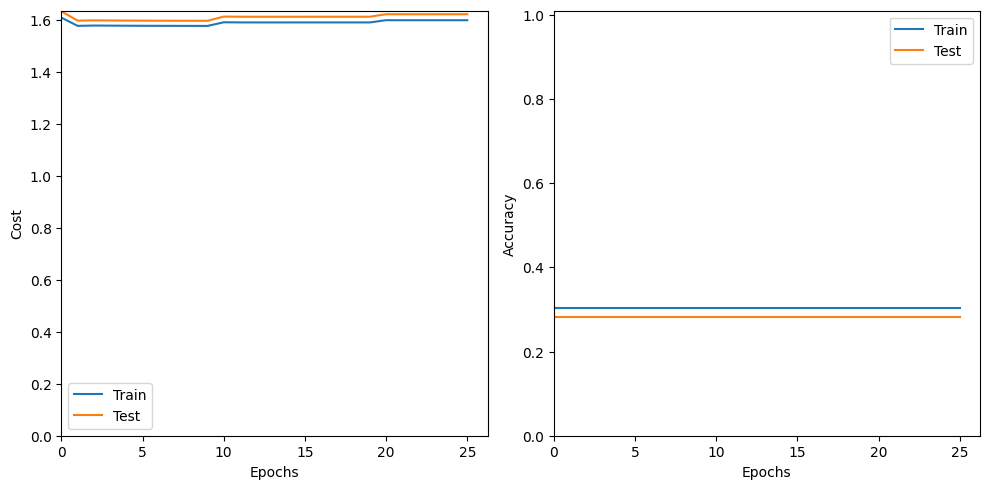

In [4]:
file_name = result[-1]
print(result[-2])

df = pd.read_csv(file_name + '.csv')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['training_cost'], label='Train')
plt.plot(df['testing_cost'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(1, 2, 2)
plt.plot(df['training_accuracy'], label='Train')
plt.plot(df['testing_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,)
plt.ylim(0,1.01)

plt.tight_layout()
plt.show()

# Section 3.
## Improving multiclass classifications with HQNN

In progress:
The HQNN setup is known to be challenging for multiclass classification setups.
The main reasons why are:
1. Difficulty encoding high-dimensional data into quantum circuits with limited qubits. This can lead to ineffective quantum representations of real-world data.
2. Lack of intrinsic non-linearity in quantum operations. Quantum circuit operations are linear (unitary), meaning learning can be restricted.
3. Hybrid models are complex to train. As seen above, it is relatively easy to fall into flat loss landscapes or introduce complex noise that inhibits training. 

As such, combining classical + quantum requires fine tuning the classical inputs, classical class output labels, and the quantum interpretation of these two simultaneously. Below are listed some work-in-progress improvements to augment the quantum layer's effectiveness for multi-class classification in this project:

1. Further reducing the input plant leave image dimensions with: 
    <br> a) greyscale reduction from RGB
    <br> b) controlling the output dimensions of the fully connected layer prior to the quantum layer
    <br> c) controlling the output dimensions of the CNN layers.
2. Altering the quantum kernel more to find more robust non-linear transformations at 
    <br> a) the cudaq.kernel with more entanglements
    <br> b) the measurement hamiltonians with more complex and orthogonal outputs. <br> 
3. Reducing the number of potential output states from $2^n$ basis state options to exactly n_classes. A limited output space may be less prone to falling into flat, featureless loss landscapes.
    <br> (i.e., using control-Z gates to reduce mixed basis state amplitudes to 0 in cudaq.kernel)  <br>
4. Adding in measurement-based tricks like all-qubit multi-observable measurement (image from Zeng et al. https://www.mdpi.com/1099-4300/24/3/394). The layout below closely mimics the setup for this project: CNN, dimensionality reduction, flattening, and a quantum layer. The main difference is this project has fully connected classical layers prior to the quantum layer. <br>

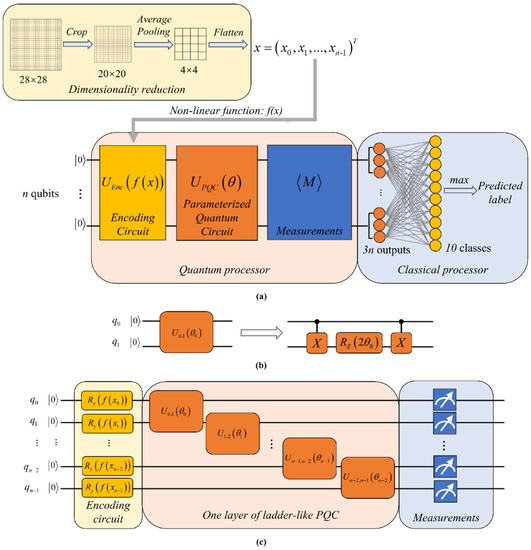

A fine tuned balance here, while keeping n_qubits constant at n_classes, is likely to lead to a better performing model. <br>
This is being balanced with not over-complicating the kernel or hamiltonians, as the more complex these become, the more complex the simulation of the qubits becomes on the CUDA-Q backend, increasing training time significantly. 

